In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the data

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/CNN/train.csv')

In [ ]:
train_df

,Image,Label
0,597631776.jpeg,normal
1,35266064.jpeg,virus
2,467414642.jpeg,normal
3,35667640.jpeg,normal
4,618841263.jpeg,normal
...,...,...
1191,118777221.jpeg,virus
1192,375945707.jpeg,normal
1193,531745860.jpeg,virus
1194,121544623.jpeg,covid


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   1196 non-null   object
 1   Label   1196 non-null   object
dtypes: object(2)
memory usage: 18.8+ KB


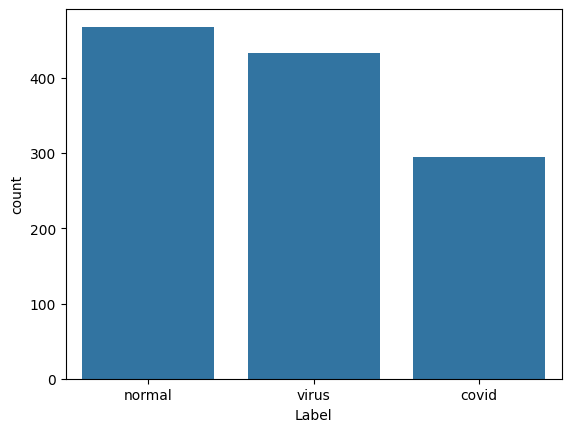

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = train_df['Label'])
plt.show()

# Reading the data and make it balance

In [ ]:
train_dir = '/content/drive/MyDrive/CNN/train'
validation_dir = '/content/drive/MyDrive/CNN/validation'
train_covid_dir = '/content/drive/MyDrive/CNN/train/covid'
train_normal_dir = '/content/drive/MyDrive/CNN/train/normal'
train_virus_dir = '/content/drive/MyDrive/CNN/train/virus'
validation_covid_dir = '/content/drive/MyDrive/CNN/validation/covid'
validation_normal_dir = '/content/drive/MyDrive/CNN/validation/normal'
validation_virus_dir = '/content/drive/MyDrive/CNN/validation/virus'

In [ ]:
import os
os.listdir(train_dir), len(os.listdir(train_covid_dir)), len(os.listdir(train_normal_dir)), len(os.listdir(train_virus_dir))

(['covid', 'normal', 'virus'], 400, 400, 400)

# make the data balunced

In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Directories for each class
#base_dir = 'path/to/train'
#covid_dir = os.path.join(base_dir, 'covid')
#normal_dir = os.path.join(base_dir, 'normal')
#virus_dir = os.path.join(base_dir, 'virus')

# Data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(directory, target_count):
    valid_extensions = ('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')
    images = [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(valid_extensions)]
    current_count = len(images)
    if current_count >= target_count:
        return

    i = 0
    while len(os.listdir(directory)) < target_count:
        img_path = images[i % current_count]
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        prefix = os.path.splitext(os.path.basename(img_path))[0]

        for batch in datagen.flow(x, batch_size=1, save_to_dir=directory, save_prefix=prefix, save_format='png'):
            if len(os.listdir(directory)) >= target_count:
                break
        i += 1

# Augment the 'covid' and 'virus' directories
augment_images(train_covid_dir, 500)
augment_images(train_virus_dir, 500)
augment_images(train_normal_dir, 500)



In [ ]:
os.listdir(train_dir), len(os.listdir(train_covid_dir)), len(os.listdir(train_normal_dir)), len(os.listdir(train_virus_dir))

(['covid', 'normal', 'virus'], 400, 400, 400)

# Hide

In [ ]:
from getpass import getpass
import os
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c copy-of-shai-level-2-training

 98% 517M/526M [00:07<00:00, 82.3MB/s]
100% 526M/526M [00:07<00:00, 76.6MB/s]


In [ ]:
!chmod 777 *

In [ ]:
!unzip copy-of-shai-level-2-training.zip

Archive:  copy-of-shai-level-2-training.zip
  inflating: sample_submission.csv   
  inflating: test/040263.jpeg        
  inflating: test/0621724.jpeg       
  inflating: test/0777738.jpeg       
  inflating: test/10256151.jpeg      
  inflating: test/105615245.jpeg     
  inflating: test/10674923.jpeg      
  inflating: test/10779808.jpeg      
  inflating: test/109152324.jpeg     
  inflating: test/111993936.jpeg     
  inflating: test/11352122.jpeg      
  inflating: test/11545830.jpeg      
  inflating: test/117560797.jpeg     
  inflating: test/118551363.jpeg     
  inflating: test/119145669.jpeg     
  inflating: test/11971304.png       
  inflating: test/120186574.jpeg     
  inflating: test/12119481.png       
  inflating: test/121283966.jpeg     
  inflating: test/123325136.jpeg     
  inflating: test/123789527.jpeg     
  inflating: test/126307058.jpeg     
  inflating: test/126768317.jpg      
  inflating: test/127126503.jpeg     
  inflating: test/127438827.jpeg     
  infl

In [ ]:
import shutil

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/CNN/train.csv')

In [ ]:
train_df['Label'].value_counts()

Label
normal    468
virus     433
covid     295
Name: count, dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   1196 non-null   object
 1   Label   1196 non-null   object
dtypes: object(2)
memory usage: 18.8+ KB


In [ ]:
train_df.shape

(1196, 2)

#Create folders for storeing data

In [ ]:
import os


# The path to the directory where the original
# dataset was uncompressed
#original_dataset_dir = 'copy-of-shai-level-2-training'

# The directory where we will
# store our smaller dataset
base_dir = '/content/drive/MyDrive/CNN'

try:
  os.mkdir(base_dir)
except:
  pass
'''
# Directories for our training and validation data
train_dir = os.path.join(base_dir, 'train')
try:
  os.mkdir(train_dir)
except:
  pass'''

############################################################################

validation_dir = os.path.join(base_dir, 'validation')
try:
  os.mkdir(validation_dir)
except:
  pass

############################################################################
'''
test_dir = os.path.join(base_dir, 'test')
try:
  os.mkdir(test_dir)
except:
  pass'''

############################################################################
'''
# Directory with our "training covid" pictures
train_covid_dir = os.path.join(train_dir, 'covid')
try:
  os.mkdir(train_covid_dir)
except:
  pass

# Directory with our "training normal" pictures
train_normal_dir = os.path.join(train_dir, 'normal')
try:
  os.mkdir(train_normal_dir)
except:
  pass

# Directory with our "training virus" pictures
train_virus_dir = os.path.join(train_dir, 'virus')
try:
  os.mkdir(train_virus_dir)
except:
  pass

'''

############################################################################

# Directory with our "validation covid" pictures
validation_covid_dir = os.path.join(validation_dir, 'covid')
try:
  os.mkdir(validation_covid_dir)
except:
  pass



# Directory with our "validation normal" pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')
try:
  os.mkdir(validation_normal_dir)
except:
  pass


# Directory with our "validation virus" pictures
validation_virus_dir = os.path.join(validation_dir, 'virus')
try:
  os.mkdir(validation_virus_dir)
except:
  pass




# Load the data into new folders

In [ ]:
import glob, random

'''
source_folder = "/content/train/covid"
destination_folder = train_covid_dir

file_path_type = ["*.jpg", "*.jpeg", "*.png"]

images = []
for file_pattern in file_path_type:
    images.extend(glob.glob(os.path.join(source_folder, file_pattern)))

random.shuffle(images)

for image_path in images[:236]:
    filename = os.path.basename(image_path)
    destination_path = os.path.join(destination_folder, filename)
    os.rename(image_path, destination_path) '''

'\nsource_folder = "/content/train/covid"\ndestination_folder = train_covid_dir\n\nfile_path_type = ["*.jpg", "*.jpeg", "*.png"]\n\nimages = []\nfor file_pattern in file_path_type:\n    images.extend(glob.glob(os.path.join(source_folder, file_pattern)))\n\nrandom.shuffle(images)\n\nfor image_path in images[:236]:\n    filename = os.path.basename(image_path)\n    destination_path = os.path.join(destination_folder, filename)\n    os.rename(image_path, destination_path) '

In [ ]:
len(os.listdir(train_covid_dir))

400

In [ ]:
source_folder = train_covid_dir
destination_folder = validation_covid_dir

file_path_type = ['*.png', '*.jpg', '*.jpeg', '*.tiff', '*.bmp', '*.gif']

images = []
for file_pattern in file_path_type:
    images.extend(glob.glob(os.path.join(source_folder, file_pattern)))

random.shuffle(images)

for image_path in images[:100]:
    filename = os.path.basename(image_path)
    destination_path = os.path.join(destination_folder, filename)
    os.rename(image_path, destination_path)

In [ ]:
len(os.listdir(validation_covid_dir))

100

In [ ]:
'''source_folder = "/content/train/normal"
destination_folder = train_normal_dir

file_path_type = ["*.jpg", "*.jpeg", "*.png"]

images = []
for file_pattern in file_path_type:
    images.extend(glob.glob(os.path.join(source_folder, file_pattern)))

random.shuffle(images)

for image_path in images[:389]:
    filename = os.path.basename(image_path)
    destination_path = os.path.join(destination_folder, filename)
    os.rename(image_path, destination_path)'''

In [ ]:
len(os.listdir(train_normal_dir))

400

In [ ]:
source_folder = train_normal_dir
destination_folder = validation_normal_dir

file_path_type = ['*.png', '*.jpg', '*.jpeg', '*.tiff', '*.bmp', '*.gif']

images = []
for file_pattern in file_path_type:
    images.extend(glob.glob(os.path.join(source_folder, file_pattern)))

random.shuffle(images)

for image_path in images[:21]:
    filename = os.path.basename(image_path)
    destination_path = os.path.join(destination_folder, filename)
    os.rename(image_path, destination_path)

In [ ]:
len(os.listdir(validation_normal_dir))

100

In [ ]:
'''source_folder = "/content/train/virus"
destination_folder = train_virus_dir

file_path_type = ["*.jpg", "*.jpeg", "*.png"]

images = []
for file_pattern in file_path_type:
    images.extend(glob.glob(os.path.join(source_folder, file_pattern)))

random.shuffle(images)

for image_path in images[:346]:
    filename = os.path.basename(image_path)
    destination_path = os.path.join(destination_folder, filename)
    os.rename(image_path, destination_path)'''

In [ ]:
len(os.listdir(train_virus_dir))

400

In [ ]:
source_folder = train_virus_dir
destination_folder = validation_virus_dir

file_path_type = ['*.png', '*.jpg', '*.jpeg', '*.tiff', '*.bmp', '*.gif']

images = []
for file_pattern in file_path_type:
    images.extend(glob.glob(os.path.join(source_folder, file_pattern)))

random.shuffle(images)

for image_path in images[:100]:
    filename = os.path.basename(image_path)
    destination_path = os.path.join(destination_folder, filename)
    os.rename(image_path, destination_path)

In [ ]:
len(os.listdir(validation_virus_dir))

100

In [ ]:
source_folder = "/content/test"
destination_folder = test_dir

file_path_type = ["*.jpg", "*.jpeg", "*.png"]

images = []
for file_pattern in file_path_type:
    images.extend(glob.glob(os.path.join(source_folder, file_pattern)))

random.shuffle(images)

for image_path in images:
    filename = os.path.basename(image_path)
    destination_path = os.path.join(destination_folder, filename)
    os.rename(image_path, destination_path)

In [ ]:
len(os.listdir(test_dir))

513

### Make the dataset balance

In [ ]:
train_dir = "/content/drive/MyDrive/CNN/train"

# preprocessing the data

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# ImageDataGenerator with augmentation for training and rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Use 224x224 for EfficientNetB0
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),  # Use 224x224 for EfficientNetB0
    batch_size=32,
    class_mode='categorical',
    shuffle=False

)


Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)

{'covid': 0, 'normal': 1, 'virus': 2}


In [ ]:
print(validation_generator.class_indices)

{'covid': 0, 'normal': 1, 'virus': 2}


In [ ]:
print(len(train_generator))

38


In [ ]:
print(len(validation_generator))

10


# Get a batch of images and labels

In [ ]:

images, labels = next(train_generator)


In [ ]:
images.shape, labels.shape

((32, 224, 224, 3), (32, 3))

In [ ]:
# [0,0,1] ==> normal
# [0,1,0] ==> virus
# [1,0,0] ==>covid

labels[0], labels[12], labels[9]

(array([0., 1., 0.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32))

In [ ]:
print("Image matrix:\n", images[0])
print("Image shape:", images[0].shape)


Image matrix:
 [[[0.2797652  0.2797652  0.2797652 ]
  [0.35914245 0.35914245 0.35914245]
  [0.34234357 0.34234357 0.34234357]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.24470998 0.24470998 0.24470998]
  [0.32408726 0.32408726 0.32408726]
  [0.36162394 0.36162394 0.36162394]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.22508205 0.22508205 0.22508205]
  [0.28903207 0.28903207 0.28903207]
  [0.36840934 0.36840934 0.36840934]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.5764706  0.5764706  0.5764706 ]
  [0.56599844 0.56599844 0.56599844]
  [0.5261347  0.5261347  0.5261347 ]]

 [[0.         0.         0.        ]
  [0.         0.      

#### every image defined from 150 rows, evrey row contain 150 column (pixcel), evrey pixcel defined from 3 color chanels

In [ ]:
len(images)

32

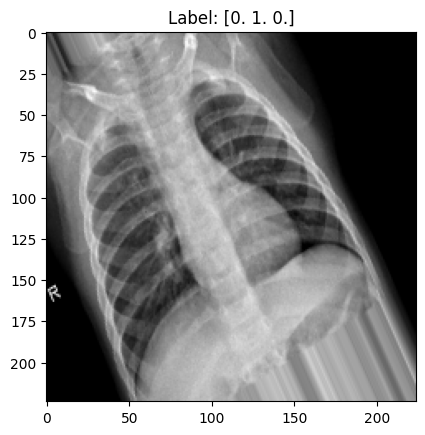

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.show()

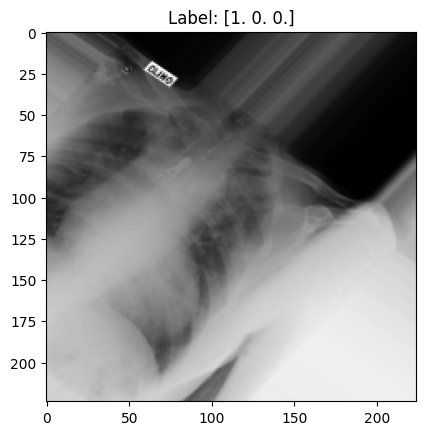

In [ ]:
plt.imshow(images[12])
plt.title(f"Label: {labels[12]}")
plt.show()

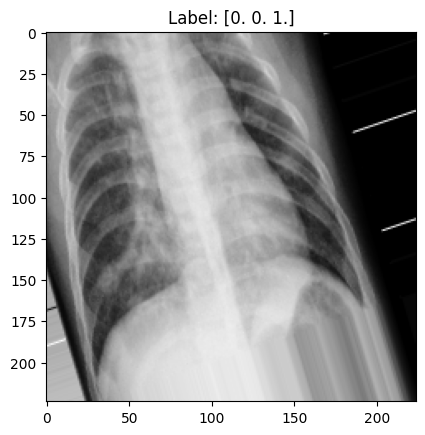

In [ ]:
plt.imshow(images[9])
plt.title(f"Label: {labels[9]}")
plt.show()

# Building and evaluate models

### 1) Multi classification model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score

In [ ]:

input_shape = (224, 224, 3)  # Use 224x224 for EfficientNetB0

num_classes = 3

model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/CNN/models/best_model.h5',  # Filepath to save the model
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the full model
    mode='min',  # Save the model with the minimum value of the monitored metric
    verbose=1  # Verbosity mode, 0 or 1
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 31,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 8,
    callbacks=[checkpoint_callback]
)


Epoch 1/15
31/31 [==============================] - ETA: 0s - loss: 1.1076 - accuracy: 0.4150
Epoch 1: val_loss improved from inf to 0.86164, saving model to /content/drive/MyDrive/CNN/models/best_model.h5
31/31 [==============================] - 348s 11s/step - loss: 1.1076 - accuracy: 0.4150 - val_loss: 0.8616 - val_accuracy: 0.5956
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/31 [==============================] - ETA: 0s - loss: 0.8921 - accuracy: 0.5551
Epoch 2: val_loss did not improve from 0.86164
31/31 [==============================] - 70s 2s/step - loss: 0.8921 - accuracy: 0.5551 - val_loss: 0.8871 - val_accuracy: 0.5333
Epoch 3/15
31/31 [==============================] - ETA: 0s - loss: 0.7925 - accuracy: 0.6241
Epoch 3: val_loss improved from 0.86164 to 0.61346, saving model to /content/drive/MyDrive/CNN/models/best_model.h5
31/31 [==============================] - 69s 2s/step - loss: 0.7925 - accuracy: 0.6241 - val_loss: 0.6135 - val_accuracy: 0.6533
Epoch 4/15
31/31 [==============================] - ETA: 0s - loss: 0.7017 - accuracy: 0.6684
Epoch 4: val_loss did not improve from 0.61346
31/31 [==============================] - 70s 2s/step - loss: 0.7017 - accuracy: 0.6684 - val_loss: 0.7365 - val_accuracy: 0.5822
Epoch 5/15
31/31 [==============================] - ETA: 0s - loss: 0.6524 - accuracy: 0.7322
Epoch 5: val_loss improved from 0.6134

In [ ]:
model.evaluate(validation_generator)

8/8 [==============================] - 8s 957ms/step - loss: 0.4800 - accuracy: 0.8222


[0.4799899160861969, 0.8222222328186035]

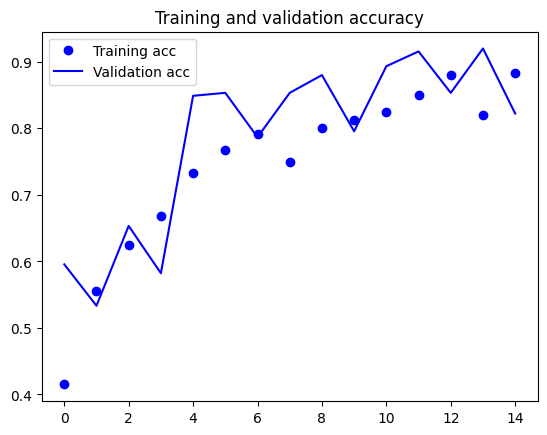

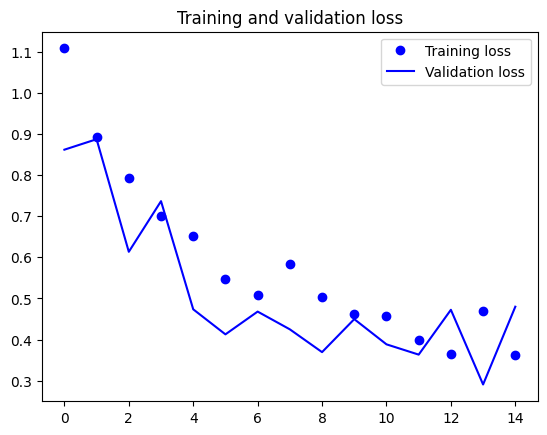

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
preds = model.predict(validation_generator)

8/8 [==============================] - 6s 687ms/step


In [ ]:
preds[:3]

array([[0.9803724 , 0.01091938, 0.00870804],
       [0.97814286, 0.01799729, 0.00385978],
       [0.9310075 , 0.05850155, 0.01049095]], dtype=float32)

In [ ]:
len(preds)

225

In [ ]:
predlabels = np.argmax(preds, axis = 1)

In [ ]:
predlabels, predlabels.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2,
        2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
        1, 1, 2, 1, 0]),
 (225,))

In [ ]:
truelabels = validation_generator.classes

In [ ]:
truelabels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [ ]:
f1_score(truelabels, predlabels, average='weighted')


0.8162931359246967

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(truelabels, predlabels)

classes = list(validation_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

"\ncm = confusion_matrix(truelabels, predlabels)\n\nclasses = list(validation_generator.class_indices.keys())\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)\nplt.figure(figsize=(8, 6))\ndisp.plot(cmap=plt.cm.Blues, values_format='d')\nplt.title('Confusion Matrix')\nplt.xlabel('Predicted Label')\nplt.ylabel('True Label')\nplt.xticks(rotation=45)\nplt.yticks(rotation=45)\nplt.show()"

*******************************************

### 2) Multilabeld classification

In [ ]:
multilabelmodel = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='sigmoid') # in multilabel classification, the activation function
                                            # in the output layer must be for binary classification, like "sigmiod"
])



multilabelmodel.compile(optimizer = 'adam',
                        loss = 'binary_crossentropy',
                        metrics = ['accuracy'])


In [ ]:
multilabelmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
checkpoint_callback2 = ModelCheckpoint(
    filepath='/content/drive/MyDrive/CNN/models/multilabelmodel2.h5',  # Filepath to save the model
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the full model
    mode='min',  # Save the model with the minimum value of the monitored metric
    verbose=1  # Verbosity mode, 0 or 1
)

In [ ]:
history2 = multilabelmodel.fit(
    train_generator,
    steps_per_epoch = 38,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 10,
    callbacks=[checkpoint_callback2]
)


Epoch 1/30
38/38 [==============================] - ETA: 0s - loss: 0.6080 - accuracy: 0.4492
Epoch 1: val_loss improved from inf to 0.54744, saving model to /content/drive/MyDrive/CNN/models/multilabelmodel2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 408s 11s/step - loss: 0.6080 - accuracy: 0.4492 - val_loss: 0.5474 - val_accuracy: 0.5533
Epoch 2/30
38/38 [==============================] - ETA: 0s - loss: 0.4833 - accuracy: 0.6467
Epoch 2: val_loss improved from 0.54744 to 0.43299, saving model to /content/drive/MyDrive/CNN/models/multilabelmodel2.h5
38/38 [==============================] - 205s 5s/step - loss: 0.4833 - accuracy: 0.6467 - val_loss: 0.4330 - val_accuracy: 0.6967
Epoch 3/30
38/38 [==============================] - ETA: 0s - loss: 0.3931 - accuracy: 0.7400
Epoch 3: val_loss improved from 0.43299 to 0.39570, saving model to /content/drive/MyDrive/CNN/models/multilabelmodel2.h5
38/38 [==============================] - 208s 5s/step - loss: 0.3931 - accuracy: 0.7400 - val_loss: 0.3957 - val_accuracy: 0.7200
Epoch 4/30
38/38 [==============================] - ETA: 0s - loss: 0.3711 - accuracy: 0.7567
Epoch 4: val_loss did not improve from 0.39570
38/38 [=============================

In [ ]:
multilabelmodel.evaluate(validation_generator)

10/10 [==============================] - 4s 439ms/step - loss: 0.1250 - accuracy: 0.9367


[0.12496381253004074, 0.9366666674613953]

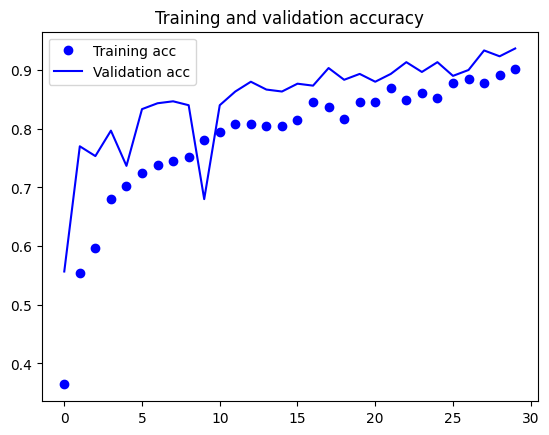

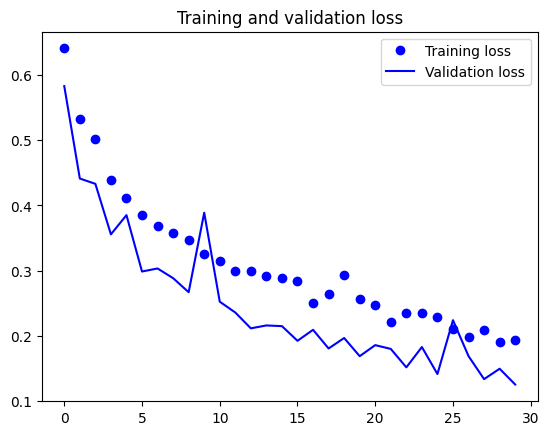

In [ ]:

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
pred2 = multilabelmodel.predict(validation_generator)

10/10 [==============================] - 5s 406ms/step


In [ ]:
pred2[:4]

array([[4.7167140e-04, 5.6614866e-04, 9.9839431e-01],
       [1.2826041e-03, 9.7283530e-01, 1.8931396e-02],
       [1.0602630e-03, 7.8839757e-02, 9.1964078e-01],
       [5.2228258e-03, 1.4931310e-02, 9.7676760e-01]], dtype=float32)

In [ ]:
predlabels2 = np.argmax(pred2, axis = 1)

In [ ]:
predlabels2, predlabels2.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 2, 2, 1, 0]),
 (225,))

In [ ]:
truelabels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

In [ ]:
f1_score(truelabels, predlabels2, average='weighted')


0.9288912404467959

<Figure size 800x600 with 0 Axes>

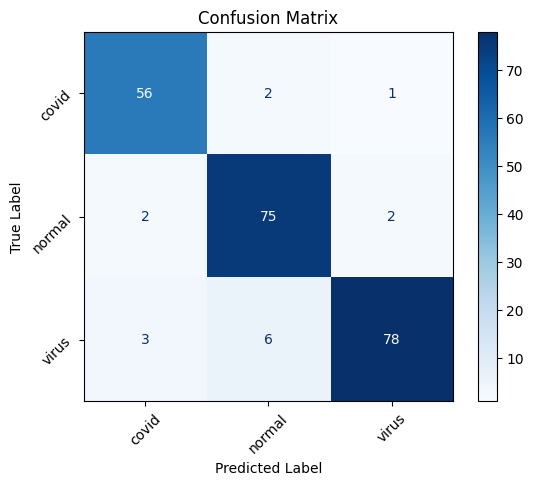

In [ ]:
cm2 = confusion_matrix(truelabels, predlabels2)

classes = list(validation_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=classes)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Using a pre-trained model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model3 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='sigmoid')  # Adjust based on your label count
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [ ]:
model_checkpoint = ModelCheckpoint(

    filepath='/content/drive/MyDrive/CNN/models/multilabelmodel3.h5',
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    mode='max',               # Maximize the monitored quantity
    verbose=1
)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(  # Filepath to save the model
                                 monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=1e-6,
                                save_best_only=True,  # Save only the best model
)

In [ ]:
# Train the model
history3 = model3.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[model_checkpoint, lr_scheduler]
)

# Try the models

#### Try the multi classification model

In [ ]:
from PIL import Image

image_path = 'cov.png'
image = Image.open(image_path)

image = image.resize((150, 150))

image_array1 = np.array(image) / 255.0
image_array1 = np.expand_dims(image_array1, axis=0)

In [ ]:
image_array1, image_array1.shape

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.57254902, 0.57254902, 0.57254902],
          [0.56862

In [ ]:
prediction = model.predict(image_array1)

1/1 [==============================] - 0s 113ms/step


In [ ]:
print(prediction[0], '\n')

if np.argmax(prediction[0]) == 0:
  print('Covid-19')
elif np.argmax(prediction[0]) == 1:
  print('Normal')
elif np.argmax(prediction[0]) == 2:
  print('Virus')
else:
  print("Other")

[0.9964592  0.00119328 0.00234751] 

Covid-19


*****************************************************

In [ ]:
image_path = 'other.jfif'
image = Image.open(image_path)

image = image.resize((150, 150))

image_array2 = np.array(image) / 255.0
image_array2 = np.expand_dims(image_array2, axis=0)

In [ ]:
prediction2 = model.predict(image_array2)

1/1 [==============================] - 0s 35ms/step


In [ ]:
print(prediction2[0], '\n')

if np.argmax(prediction2[0]) == 0:
  print('Covid-19')
elif np.argmax(prediction2[0]) == 1:
  print('Normal')
elif np.argmax(prediction2[0]) == 2:
  print('Virus')
else:
  print("Other")

[0.06793183 0.78742355 0.14464463] 

Normal


*****************************************************************************

#### Try the multilabel classification model

In [ ]:
pred = multilabelmodel.predict(image_array1)

1/1 [==============================] - 0s 103ms/step


In [ ]:
print(pred[0], '\n')

if np.argmax(pred[0]) == 0:
  print('Covid-19')
elif np.argmax(pred[0]) == 1:
  print('Normal')
elif np.argmax(pred[0]) == 2:
  print('Virus')
else:
  print("Other")

[9.9858457e-01 1.2983469e-03 1.8353749e-04] 

Covid-19


******************************************************

In [ ]:
pred2 = multilabelmodel.predict(image_array2)

1/1 [==============================] - 0s 31ms/step


In [ ]:
print(pred2[0], '\n')

if pred2[0][np.argmax(pred2[0])] >= 0.8:
  print(f'The class is {np.argmax(pred2[0])}')
else:
  print("Other")

[0.23389949 0.55986685 0.05088022] 

Other


******************************************

In [ ]:
image_path = 'oth.jfif'
image = Image.open(image_path)

image = image.resize((150, 150))

image_array3 = np.array(image) / 255.0
image_array3 = np.expand_dims(image_array3, axis=0)

In [ ]:
pred3 = multilabelmodel.predict(image_array3)

1/1 [==============================] - 0s 54ms/step


In [ ]:
print(pred3[0], '\n')

if pred3[0][np.argmax(pred3[0])] >= 0.6:
  print(f'The class is {np.argmax(pred3[0])}')
else:
  print("Other")

[4.6169460e-01 2.7381787e-01 3.1406088e-07] 

Other


********************************************************************************************************************

#ppppppp

In [ ]:
df = pd.read_csv('sample_submission.csv')

In [ ]:
df.head()

,Image,Label
0,402124007.png,NaN
1,20328626.jpeg,NaN
2,21235419.jpeg,NaN
3,188238579.png,NaN
4,266831585.jpeg,NaN


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


# Define the path to your test data folder
test_data_folder = test_dir

In [ ]:
image_width, image_height = 150, 150

predictions = []

# Iterate over the test data folder
for image_file in os.listdir(test_data_folder):
    # Load and preprocess each test image
    image_path = os.path.join(test_data_folder, image_file)
    img = load_img(image_path, target_size=(image_width, image_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values

    # Make predictions on the preprocessed image
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get the index of the class with highest probability
    predictions.append(predicted_class)

# Convert predictions to class labels based on your class mapping
# Assuming 0: COVID, 1: Normal, 2: Virus
class_mapping = {0: 'covid', 1: 'normal', 2: 'virus'}
predicted_labels = [class_mapping[prediction] for prediction in predictions]

1/1 [==============================] - 0s 44ms/step


In [ ]:
len(predicted_labels)

513

### Sve the test result into csv file

In [ ]:
import csv

output_file = 'predictions.csv'

with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Image', 'Label'])  # Write header
    for image_file, predicted_label in zip(os.listdir(test_data_folder), predicted_labels):
        writer.writerow([image_file, predicted_label])

print(f"Predictions saved to {output_file}.")

Predictions saved to predictions.csv.


************************************************************

# Transfer learning

### ResNet50 Model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

ResNet50_model = Model(inputs=base_model.input, outputs=predictions)

ResNet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#ResNet50_model.summary()

In [ ]:
ResNet50_model.fit_generator(
    train_generator,
    steps_per_epoch=31,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=12
)

<ipython-input-47-11ab237fda5a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  ResNet50_model.fit_generator(


Epoch 1/5
31/31 [==============================] - 121s 4s/step - loss: 1.0945 - accuracy: 0.3903 - val_loss: 1.0338 - val_accuracy: 0.3956
Epoch 2/5
31/31 [==============================] - 114s 4s/step - loss: 1.0398 - accuracy: 0.4305 - val_loss: 1.0226 - val_accuracy: 0.3911
Epoch 3/5
31/31 [==============================] - 115s 4s/step - loss: 1.0145 - accuracy: 0.4521 - val_loss: 0.9647 - val_accuracy: 0.5244
Epoch 4/5
31/31 [==============================] - 123s 4s/step - loss: 0.9764 - accuracy: 0.5108 - val_loss: 0.9909 - val_accuracy: 0.5244
Epoch 5/5
31/31 [==============================] - 141s 5s/step - loss: 0.9557 - accuracy: 0.5283 - val_loss: 0.9236 - val_accuracy: 0.4889


### VGG16 Model

In [ ]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Freeze the base model layers (optional)
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

VGG16_model = Model(inputs=base_model.input, outputs=predictions)

VGG16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
hist = VGG16_model.fit_generator(
    train_generator,
    steps_per_epoch=31,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=12
)

<ipython-input-49-9b8b716f3ed3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = VGG16_model.fit_generator(


Epoch 1/5
31/31 [==============================] - 314s 10s/step - loss: 0.9059 - accuracy: 0.5819 - val_loss: 0.7033 - val_accuracy: 0.7200
Epoch 2/5
31/31 [==============================] - 311s 10s/step - loss: 0.6454 - accuracy: 0.7827 - val_loss: 0.5685 - val_accuracy: 0.7689
Epoch 3/5
31/31 [==============================] - 340s 11s/step - loss: 0.5193 - accuracy: 0.8280 - val_loss: 0.4498 - val_accuracy: 0.8222
Epoch 4/5
31/31 [==============================] - 337s 11s/step - loss: 0.4663 - accuracy: 0.8311 - val_loss: 0.3625 - val_accuracy: 0.8533
Epoch 5/5
31/31 [==============================] - 342s 11s/step - loss: 0.3798 - accuracy: 0.8867 - val_loss: 0.3533 - val_accuracy: 0.8711


### VGG19 Model

In [ ]:
from tensorflow.keras.applications import VGG19

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

VGG19_model = Model(inputs=base_model.input, outputs=predictions)

VGG19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
histo = VGG19_model.fit_generator(
    train_generator,
    steps_per_epoch=31,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=12
)

<ipython-input-51-fb403bcfad90>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  histo = VGG19_model.fit_generator(


Epoch 1/5
31/31 [==============================] - 409s 13s/step - loss: 0.8735 - accuracy: 0.5963 - val_loss: 0.6623 - val_accuracy: 0.7422
Epoch 2/5
31/31 [==============================] - 396s 13s/step - loss: 0.6287 - accuracy: 0.7662 - val_loss: 0.5243 - val_accuracy: 0.8133
Epoch 3/5
31/31 [==============================] - 396s 13s/step - loss: 0.5398 - accuracy: 0.7878 - val_loss: 0.4572 - val_accuracy: 0.8533
Epoch 4/5
31/31 [==============================] - 396s 13s/step - loss: 0.4979 - accuracy: 0.8095 - val_loss: 0.4193 - val_accuracy: 0.8533
Epoch 5/5
31/31 [==============================] - 395s 13s/step - loss: 0.4686 - accuracy: 0.8198 - val_loss: 0.4720 - val_accuracy: 0.8400


:)